# This project predicts which customers are more likely to get churned.

* A manager at the bank is disturbed with more and more customers leaving their credit card services. 
* They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction. 
* Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. 
* There are nearly 18 features.We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

## Description Of Data

* CLIENTNUM : Client number a is unique identifier for the customer holding the account.
* Attrition_Flag : Internal event (customer activity) variable - if the account is closed then attrited customer otherwise existing customer
* Customer_Age : Customer's Age in Years
* Dependent_count : Number of dependents
* Education_Level : Educational Qualification of the account holder (example: high school, college graduate, etc.)
* Marital_Status : Married, Single, Divorced, Unknown
* Income_Category : Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120)
* Card_Category : Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
* Months_on_book : Period of relationship with bank
* Total_Relationship_Count : Total no. of products held by the customer
* Months_Inactive_12_mon : No. of months inactive in the last 12 months
* Contacts_Count_12_mon : No. of Contacts in the last 12 months
* Credit_Limint : Credit Limit on the Credit Card
* Total_Revolving_Bal : Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy : Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1 : Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt : Total Transaction Amount (Last 12 months)
* Total_Trans_Ct : Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1 : Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio : Average Card Utilization Ratio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Droping last two columns as instructed on website
data = data.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
data['Attrition_Flag'].keys()

RangeIndex(start=0, stop=10127, step=1)

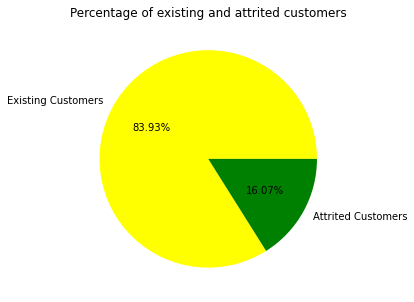

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(data['Attrition_Flag'].value_counts(), labels=['Existing Customers','Attrited Customers'],colors=['Yellow','Green'], autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of existing and attrited customers')
plt.show()

# Transforming objects value to numerical value

In [6]:
data.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [7]:
data.dtypes[data.dtypes==object]

Attrition_Flag     object
Gender             object
Education_Level    object
Marital_Status     object
Income_Category    object
Card_Category      object
dtype: object

In [8]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [9]:
data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [10]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [11]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [12]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [13]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [14]:
copy = data

In [15]:
copy['Attrition_Flag'] = copy['Attrition_Flag'].astype('category')

In [16]:
copy['Gender'] = copy['Gender'].astype('category')
copy['Education_Level'] = copy['Education_Level'].astype('category')
copy['Marital_Status'] = copy['Marital_Status'].astype('category')
copy['Income_Category'] = copy['Income_Category'].astype('category')
copy['Card_Category'] = copy['Card_Category'].astype('category')

In [17]:
copy['Attrition_Flag'] = copy['Attrition_Flag'].cat.codes
copy['Gender'] = copy['Gender'].cat.codes
copy['Education_Level'] = copy['Education_Level'].cat.codes
copy['Marital_Status'] = copy['Marital_Status'].cat.codes
copy['Income_Category'] = copy['Income_Category'].cat.codes
copy['Card_Category'] = copy['Card_Category'].cat.codes

In [18]:
copy['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

In [19]:
copy['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [20]:
copy['Education_Level'].value_counts()

2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: Education_Level, dtype: int64

In [21]:
copy['Marital_Status'].value_counts()

1    4687
2    3943
3     749
0     748
Name: Marital_Status, dtype: int64

In [22]:
copy['Income_Category'].value_counts()

4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: Income_Category, dtype: int64

In [23]:
copy['Card_Category'].value_counts()

0    9436
3     555
1     116
2      20
Name: Card_Category, dtype: int64

In [24]:
copy.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,0,4,3,3,4,0,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [25]:
temp = list(copy['Attrition_Flag'])
copy = copy.drop(columns=['Attrition_Flag'])
copy['Attrition_Flag'] = temp
copy.head(5)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,768805383,45,1,3,3,1,2,0,39,5,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,818770008,49,0,5,2,2,4,0,44,6,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,713982108,51,1,3,2,1,3,0,36,4,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,769911858,40,0,4,3,3,4,0,34,3,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,709106358,40,1,3,5,1,2,0,21,5,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [26]:
pd.set_option('display.max_columns', 25)
copy.corr()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
CLIENTNUM,1.000000,0.007613,0.020188,0.006772,-0.003789,-0.003284,-0.025802,0.007511,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,0.046430
Customer_Age,0.007613,1.000000,-0.017312,-0.122254,0.004083,-0.011265,-0.013474,-0.020131,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,-0.018203
Gender,0.020188,-0.017312,1.000000,0.004563,0.000694,-0.000007,-0.539731,0.079203,-0.006728,0.003157,-0.011163,0.039987,0.420806,0.029658,0.418059,0.026712,0.024890,-0.067454,-0.005800,-0.257851,0.037272
Dependent_count,0.006772,-0.122254,0.004563,1.000000,0.003788,0.000337,-0.035417,0.021674,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,-0.018991
Education_Level,-0.003789,0.004083,0.000694,0.003788,1.000000,0.014720,-0.010442,-0.007212,-0.004953,0.009636,-0.008077,0.008500,0.003076,0.008029,0.002356,0.005534,0.015287,0.003046,0.007279,0.006477,-0.005551
Marital_Status,-0.003284,-0.011265,-0.000007,0.000337,0.014720,1.000000,0.009659,0.035947,-0.012084,-0.021393,0.001709,0.001476,0.031292,-0.025386,0.033562,-0.036210,0.044553,0.075888,0.000258,-0.027451,-0.018597
Income_Category,-0.025802,-0.013474,-0.539731,-0.035417,-0.010442,0.009659,1.000000,-0.051632,-0.016375,0.008138,0.024037,-0.018367,-0.225394,-0.025815,-0.223033,-0.004534,-0.014686,0.033498,0.014892,0.123287,-0.017584
Card_Category,0.007511,-0.020131,0.079203,0.021674,-0.007212,0.035947,-0.051632,1.000000,-0.014749,-0.073770,-0.016816,-0.000919,0.484090,0.017027,0.482462,0.004061,0.176377,0.116579,-0.004541,-0.205089,0.006038
Months_on_book,0.134588,0.788912,-0.006728,-0.103062,-0.004953,-0.012084,-0.016375,-0.014749,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,-0.013687
Total_Relationship_Count,0.006907,-0.010931,0.003157,-0.039076,0.009636,-0.021393,0.008138,-0.073770,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,0.150005


# Plotting some of the interesting patterns based on correlation graph

### 1. Total Transaction Count and Total Transaction Amount

Text(0, 0.5, 'Total Transaction Amount')

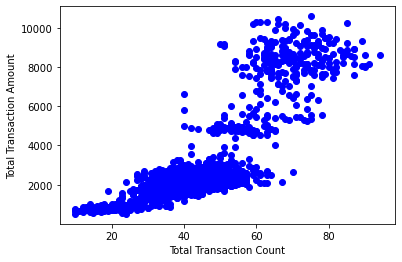

In [27]:
# Only Attrited Customers in blue
plt.scatter(copy.Total_Trans_Ct[copy.Attrition_Flag==0],
            copy.Total_Trans_Amt[copy.Attrition_Flag==0],
           c='blue')
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")


Text(0, 0.5, 'Total Transaction Amount')

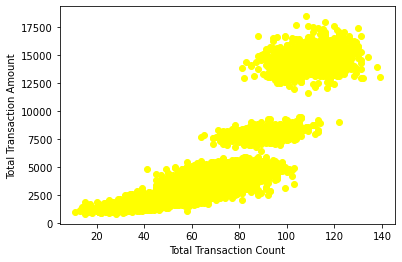

In [28]:
# Only Existing Customers
plt.scatter(copy.Total_Trans_Ct[copy.Attrition_Flag==1],
            copy.Total_Trans_Amt[copy.Attrition_Flag==1],
           c='yellow');
plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")

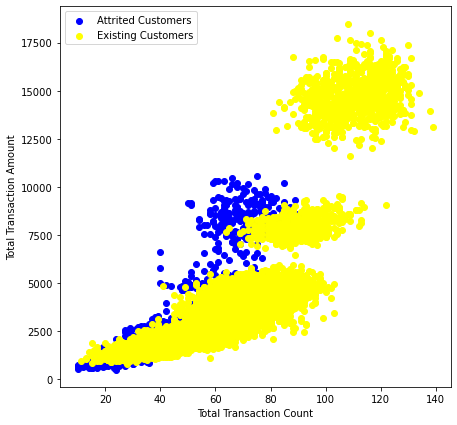

In [29]:
#Visualizing data across Total Transaction Count and Total Transaction Amount
plt.figure(figsize=(7,7))

#Attrited Customers
plt.scatter(copy.Total_Trans_Ct[copy.Attrition_Flag==0],
            copy.Total_Trans_Amt[copy.Attrition_Flag==0],
           c='blue', label='Attrited Customers')

#Existing Customers
plt.scatter(copy.Total_Trans_Ct[copy.Attrition_Flag==1],
            copy.Total_Trans_Amt[copy.Attrition_Flag==1],
           c='yellow', label='Existing Customers');  # With the help of labels we can pring legend

plt.xlabel("Total Transaction Count")
plt.ylabel("Total Transaction Amount")
plt.legend()

### Conclusion : 
* The customers whose transaction count is more than 100 and performs transaction of amount more than 11000 are more likely to stay with our credit card service.
* The customers who performs transaction between 6000 - 11000 amount and transaction count is less than 65 are more likely to get attrited.

### 2. Total_Ct_Chng_Q4_Q1	

Text(0, 0.5, 'Attrited          Existing')

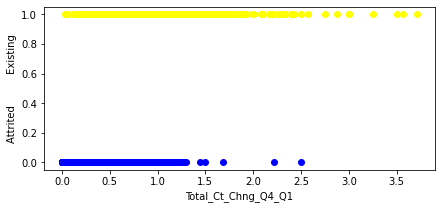

In [30]:
#Visualizing data across Total_Ct_Chng_Q4_Q1 and Attrition_Flag
plt.figure(figsize=(7,3))

#Attrited Customers
plt.scatter(copy.Total_Ct_Chng_Q4_Q1[copy.Attrition_Flag==0],
            copy.Attrition_Flag[copy.Attrition_Flag==0],
           c='blue')

#Existing Customers
plt.scatter(copy.Total_Ct_Chng_Q4_Q1[copy.Attrition_Flag==1],
            copy.Attrition_Flag[copy.Attrition_Flag==1],
           c='yellow');

plt.xlabel("Total_Ct_Chng_Q4_Q1")
plt.ylabel("Attrited          Existing")

### Conclusion :
* Transaction count change (Q4 over Q1) more than 1.4 gives a strong positive signal that customers will continue our service 

### 3. Total Revolving Balance

Text(0, 0.5, 'Attrited          Existing')

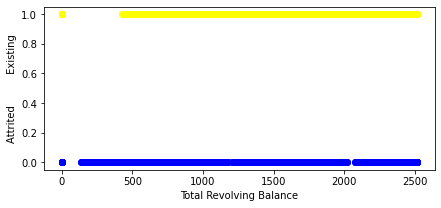

In [31]:
#Visualizing data across Total_Revolving_Balance and Attrition_Flag
plt.figure(figsize=(7,3))

#Attrited Customers
plt.scatter(copy.Total_Revolving_Bal[copy.Attrition_Flag==0],
            copy.Attrition_Flag[copy.Attrition_Flag==0],
           c='blue')

#Existing Customers
plt.scatter(copy.Total_Revolving_Bal[copy.Attrition_Flag==1],
            copy.Attrition_Flag[copy.Attrition_Flag==1],
           c='yellow');

plt.xlabel("Total Revolving Balance")
plt.ylabel("Attrited          Existing")

### Conclusion :
* If Total Revovling Balance is less than 400, than the customer is most likely to get attrited.

### 4. Total Revolving Balance and Average Utilization Ratio

Text(0, 0.5, 'Average Utilization Ratio')

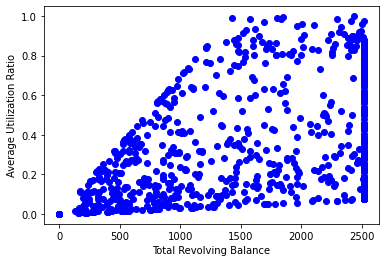

In [32]:
# Only Attrited Customers in blue
plt.scatter(copy.Total_Revolving_Bal[copy.Attrition_Flag==0],
            copy.Avg_Utilization_Ratio[copy.Attrition_Flag==0],
           c='blue')
plt.xlabel("Total Revolving Balance")
plt.ylabel("Average Utilization Ratio")

Text(0, 0.5, 'Average Utilization Ratio')

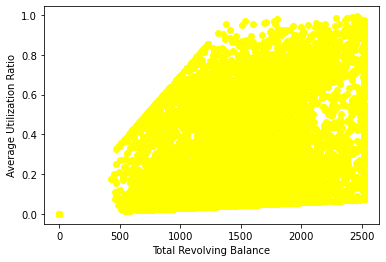

In [33]:
# Only Existing Customers
plt.scatter(copy.Total_Revolving_Bal[copy.Attrition_Flag==1],
            copy.Avg_Utilization_Ratio[copy.Attrition_Flag==1],
           c='yellow');
plt.xlabel("Total Revolving Balance")
plt.ylabel("Average Utilization Ratio")

Text(0, 0.5, 'Average Utilization Ratio')

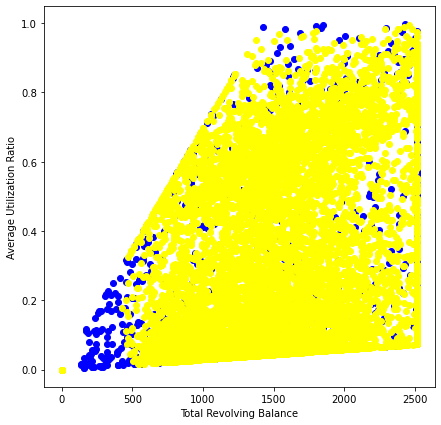

In [34]:
#Visualizing data across Total_Revolving_Balance and Average utilization ratio
plt.figure(figsize=(7,7))

#Attrited Customers
plt.scatter(copy.Total_Revolving_Bal[copy.Attrition_Flag==0],
            copy.Avg_Utilization_Ratio[copy.Attrition_Flag==0],
           c='blue')

#Existing Customers
plt.scatter(copy.Total_Revolving_Bal[copy.Attrition_Flag==1],
            copy.Avg_Utilization_Ratio[copy.Attrition_Flag==1],
           c='yellow');

plt.xlabel("Total Revolving Balance")
plt.ylabel("Average Utilization Ratio")

### 5. Credit Limit and Average Open To Buy

Text(0, 0.5, 'Customer Age')

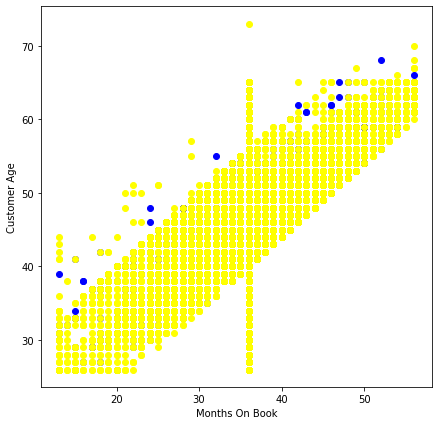

In [35]:
#Visualizing data across Customer_Age and Months_On_Book
plt.figure(figsize=(7,7))

#Attrited Customers
plt.scatter(copy.Months_on_book[copy.Attrition_Flag==0],
            copy.Customer_Age[copy.Attrition_Flag==0],
           c='blue')

#Existing Customers
plt.scatter(copy.Months_on_book[copy.Attrition_Flag==1],
            copy.Customer_Age[copy.Attrition_Flag==1],
           c='yellow');

plt.xlabel("Months On Book")
plt.ylabel("Customer Age")

### Conclusion :
* There is a linear relation betwen Customer Age and Months on book. The more the customer age is, the more is his months on book 

## Test split

In [36]:
np.random.seed(6)

from sklearn.model_selection import train_test_split

A = copy.drop("Attrition_Flag", axis=1)
B = copy["Attrition_Flag"]

a_train , a_test , b_train , b_test = train_test_split(A,B, test_size=0.04)

In [37]:
b_test[b_test==0].value_counts()

0    70
Name: Attrition_Flag, dtype: int64

## Manually pulling 200 rows of attrited customers and 200 rows of existing customers and putting it as final test set.

In [38]:
copy = copy.drop("CLIENTNUM",axis=1)
copy.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,1
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,1
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,1


In [39]:
all_ac = copy[copy['Attrition_Flag']==0]
all_ac.shape

(1627, 20)

In [40]:
all_ec = copy[copy['Attrition_Flag']==1]
all_ec.shape

(8500, 20)

In [41]:
np.random.seed(42)
all_ac = all_ac.sample(frac=1)
all_ec = all_ec.sample(frac=1)

In [42]:
np.random.seed(43)
all_ac = all_ac.sample(frac=1)
all_ec = all_ec.sample(frac=1)

In [43]:
all_ac.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
4133,48,1,2,3,1,3,0,32,1,2,4,16362.0,2268,14094.0,0.841,2228,37,0.850,0.139,0
6373,59,0,2,3,1,1,0,36,3,3,3,4375.0,0,4375.0,0.621,2507,53,0.472,0.000,0
9639,49,0,3,6,2,4,0,37,2,2,2,5855.0,0,5855.0,0.962,9202,80,0.860,0.000,0
7932,39,1,3,0,1,3,0,30,2,3,3,4618.0,0,4618.0,0.717,2476,49,0.750,0.000,0
4796,44,0,3,2,1,4,0,36,6,3,4,1984.0,0,1984.0,0.890,2506,46,0.643,0.000,0


In [44]:
all_ac.shape

(1627, 20)

In [45]:
final_test_ac = all_ac.head(200)
final_test_ec = all_ec.head(200)

In [46]:
l = final_test_ac.index
type(l)

pandas.core.indexes.numeric.Int64Index

In [47]:
len(l)

200

In [48]:
copy.shape

(10127, 20)

In [49]:
copy = copy.drop(index=l)
copy.shape

(9927, 20)

In [50]:
m = final_test_ec.index
copy = copy.drop(index=m)
copy.shape

(9727, 20)

In [51]:
final_test = pd.concat([final_test_ac,final_test_ec],axis=0)
final_test.shape

(400, 20)

In [52]:
final_test.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
4133,48,1,2,3,1,3,0,32,1,2,4,16362.0,2268,14094.0,0.841,2228,37,0.850,0.139,0
6373,59,0,2,3,1,1,0,36,3,3,3,4375.0,0,4375.0,0.621,2507,53,0.472,0.000,0
9639,49,0,3,6,2,4,0,37,2,2,2,5855.0,0,5855.0,0.962,9202,80,0.860,0.000,0
7932,39,1,3,0,1,3,0,30,2,3,3,4618.0,0,4618.0,0.717,2476,49,0.750,0.000,0
4796,44,0,3,2,1,4,0,36,6,3,4,1984.0,0,1984.0,0.890,2506,46,0.643,0.000,0


### Base model with recall 78% for finding attrited customers

In [53]:
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

P = copy.drop("Attrition_Flag", axis=1)
J = copy["Attrition_Flag"]

l_train , l_test , m_train , m_test = train_test_split(P,J, test_size=0.2)

clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(l_train,m_train)
clf1.score(l_test,m_test)

0.9624871531346352

In [54]:
preds1 = clf1.predict(l_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(m_test,preds1))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       282
           1       0.97      0.99      0.98      1664

    accuracy                           0.96      1946
   macro avg       0.94      0.90      0.92      1946
weighted avg       0.96      0.96      0.96      1946



In [56]:
confusion_matrix(m_test,preds1)

array([[ 229,   53],
       [  20, 1644]], dtype=int64)

In [57]:
ft1 = final_test.drop("Attrition_Flag",axis=1)
ft2 = final_test["Attrition_Flag"]

In [58]:
preds_on_finaltest = clf1.predict(ft1)
print(classification_report(ft2,preds_on_finaltest))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90       200
           1       0.85      0.98      0.91       200

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.90       400
weighted avg       0.92      0.91      0.90       400



In [59]:
confusion_matrix(ft2,preds_on_finaltest)

array([[165,  35],
       [  3, 197]], dtype=int64)

## Trying SMOTE for handling imbalanced dataset 

In [60]:
existing_cus = copy[copy['Attrition_Flag']==1]
existing_cus.shape

(8300, 20)

In [61]:
attr_cus = copy[copy['Attrition_Flag']==0]
attr_cus.shape

(1427, 20)

In [62]:
# Using imbalance library to handle this imbalanced dataset
# from imblearn.over_sampling import RandomOverSampler

In [63]:
# Implementing oversampling for handling imbalanced 
# Initial ratio of data is 1:5 (100 0's and 500 1's). then random_state=1 will make it 1:1 (500 0's and 500 1's) . random_state=0.5 will make it 1:2 (250 0's and 500 1's).
# ros = RandomOverSampler(sampling_strategy=1,random_state=10)
# P_new,J_new = ros.fit_sample(P,J)

In [64]:
attr_cus.shape

(1427, 20)

In [65]:
add_attr_cus = pd.concat([attr_cus,attr_cus,attr_cus,attr_cus,attr_cus],axis=0)
add_attr_cus.shape

(7135, 20)

In [66]:
existing_cus.shape

(8300, 20)

In [67]:
bal_data = pd.concat([existing_cus,add_attr_cus],axis=0)
bal_data.shape

(15435, 20)

In [68]:
np.random.seed(11)
bal_data2 = bal_data.sample(frac=1)

In [69]:
np.random.seed(12)
bal_data2 = bal_data2.sample(frac=1)
bal_data2.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
5177,34,0,2,2,1,4,0,29,5,2,2,5845.0,0,5845.0,0.504,2308,35,0.591,0.000,0
88,44,1,3,3,2,2,0,31,4,3,1,12756.0,837,11919.0,1.932,1413,14,1.800,0.066,1
9691,47,0,4,3,3,5,0,42,3,3,2,16998.0,1404,15594.0,0.785,13977,127,0.693,0.083,1
7529,41,0,2,0,0,4,0,36,3,3,4,1569.0,257,1312.0,0.408,2288,45,0.667,0.164,0
30,53,1,3,6,1,3,0,33,3,2,3,2753.0,1811,942.0,0.977,1038,25,2.571,0.658,1


## Fitting RandomForestClassifier 

In [70]:
np.random.seed(42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

E = bal_data2.drop("Attrition_Flag", axis=1)
F = bal_data2["Attrition_Flag"]

e_train , e_test , f_train , f_test = train_test_split(E,F, test_size=0.2)

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(e_train,f_train)
clf2.score(e_test,f_test)

0.9867184969225785

In [71]:
preds2 = clf1.predict(e_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

print(classification_report(f_test,preds2))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1417
           1       0.97      1.00      0.98      1670

    accuracy                           0.98      3087
   macro avg       0.98      0.98      0.98      3087
weighted avg       0.98      0.98      0.98      3087



## Making prediction on final test on the basis of clf2

In [73]:
preds_on_finaltest2 = clf2.predict(ft1)
print(classification_report(ft2,preds_on_finaltest2))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       200
           1       0.92      0.97      0.94       200

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [74]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf2,
                         e_train,
                         f_train,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9856655893402074

In [75]:
# Cross-validated precision
cv_prec = cross_val_score(clf2,
                         e_train,
                         f_train,
                         cv=5,
                         scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.9986057303188908

In [76]:
# Cross-validated recall
cv_rec = cross_val_score(clf2,
                         e_train,
                         f_train,
                         cv=5,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9751131221719456

In [77]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf2,
                         e_train,
                         f_train,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.9865662161585416

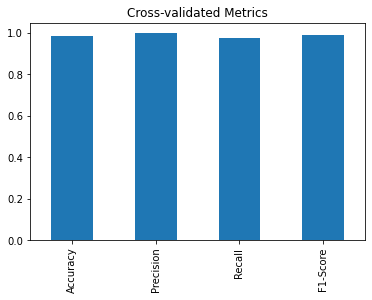

In [78]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_prec,
                           "Recall":cv_rec,
                           "F1-Score":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Metrics",
                      legend=False);

In [79]:
confusion_matrix(ft2,preds_on_finaltest2)

array([[182,  18],
       [  5, 195]], dtype=int64)

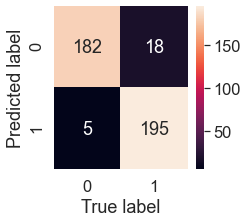

In [80]:
# Drawing confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(ft2,preds_on_finaltest2):
    # Plot a confusion matrix using Seaborn's heatmap()
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ft2,preds_on_finaltest2),
                     annot=True,    # annot is true then only the numbers will appear in matrix otherwise won't
                     cbar=True,     # Color bar on right will be shown if true
                     fmt='g')       # By default .2g was showing error, so it is set to g
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
      

plot_conf_mat(ft2,preds_on_finaltest2)

In [81]:
type(preds_on_finaltest2)

numpy.ndarray

In [82]:
preds_on_finaltest2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,

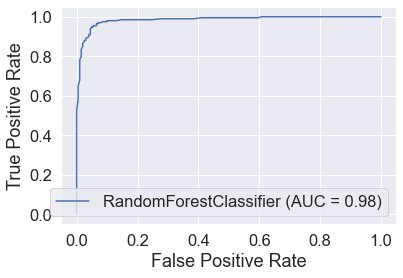

In [83]:
# Plot ROC curve. ROC curve plots True positive rate vs False positive rate
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf2,ft1,ft2)

## Controlling trade off between Precision and Recall manually. Thus, improved recall for finding attrited customers by 5% and finally got 95% recall for finding attrited customers.

In [84]:
preds_on_finaltest3 = clf2.predict_proba(ft1)
preds_on_finaltest3.shape

(400, 2)

In [85]:
preds_on_finaltest3

array([[0.73, 0.27],
       [0.91, 0.09],
       [0.85, 0.15],
       [0.97, 0.03],
       [0.99, 0.01],
       [0.84, 0.16],
       [0.73, 0.27],
       [0.73, 0.27],
       [0.77, 0.23],
       [0.57, 0.43],
       [0.59, 0.41],
       [0.98, 0.02],
       [0.93, 0.07],
       [1.  , 0.  ],
       [0.13, 0.87],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.72, 0.28],
       [0.86, 0.14],
       [0.88, 0.12],
       [0.96, 0.04],
       [0.96, 0.04],
       [0.33, 0.67],
       [1.  , 0.  ],
       [0.46, 0.54],
       [0.93, 0.07],
       [0.76, 0.24],
       [1.  , 0.  ],
       [0.92, 0.08],
       [0.63, 0.37],
       [0.44, 0.56],
       [0.89, 0.11],
       [0.93, 0.07],
       [0.96, 0.04],
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [0.83, 0.17],
       [0.85, 0.15],
       [0.18, 0.82],
       [0.95, 0.05],
       [0.9 , 0.1 ],
       [0.86, 0.14],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.98, 0.02],
       [0.94,

In [86]:
my_custom_pred = []
for i in range(0,400):
    for j in range(0,1):
        if (preds_on_finaltest3[i][j]>0.35):
            my_custom_pred.append(0)
        else :
            my_custom_pred.append(1)
len(my_custom_pred)

400

In [87]:
my_custom_pred_mat = np.matrix(my_custom_pred)
my_custom_pred_mat

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [88]:
my_custom_pred_mat.shape

(1, 400)

In [89]:
my_custom_pred_mat = my_custom_pred_mat.reshape(-1,1)
my_custom_pred_mat.shape

(400, 1)

In [90]:
confusion_matrix(ft2,my_custom_pred_mat)

array([[190,  10],
       [ 10, 190]], dtype=int64)

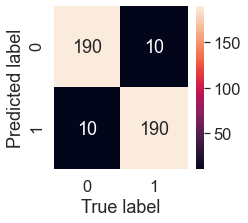

In [91]:
# Drawing confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(ft2,my_custom_pred_mat):
    # Plot a confusion matrix using Seaborn's heatmap()
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ft2,my_custom_pred_mat),
                     annot=True,    # annot is true then only the numbers will appear in matrix otherwise won't
                     cbar=True,     # Color bar on right will be shown if true
                     fmt='g')       # By default .2g was showing error, so it is set to g
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
      

plot_conf_mat(ft2,my_custom_pred_mat)

In [92]:
print(classification_report(ft2,my_custom_pred_mat))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       200
           1       0.95      0.95      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



## Hyperparameter tuning 

In [93]:
# Setup RandomForestClassifier instance
clf3 = RandomForestClassifier()
clf3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [94]:
np.random.seed(42)

train_scores = []
test_scores = []

# Create a list of different values for n_estimators
estimators_list = range(50,1000,50)


# Loop through different n_neighbors
for i in estimators_list:
    clf3.set_params(n_estimators=i)
    
    # Fit the algorithm
    clf3.fit(e_train,f_train)
    
    # Update the training scores list
    train_scores.append(clf3.score(e_train,f_train))
    
    # Update the test scores list
    test_scores.append(clf3.score(ft1,ft2))

Maximum RandomForestClassifier score on test data : 94.25


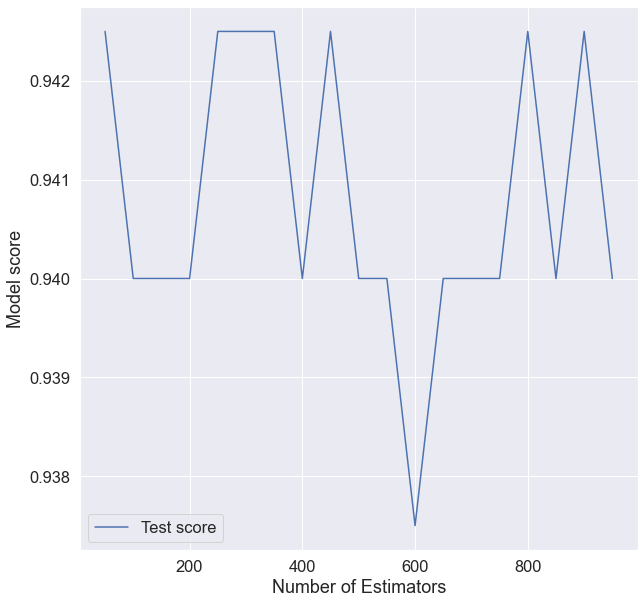

In [95]:
plt.figure(figsize=(10,10))
# plt.plot(estimators_list, train_scores, label="Train score")
plt.plot(estimators_list, test_scores, label="Test score")
plt.xlabel("Number of Estimators")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum RandomForestClassifier score on test data : {max(test_scores)*100:.2f}")

In [96]:
np.random.seed(42)

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
max_depth_list = range(1,20,1)


# Loop through different n_neighbors
for i in max_depth_list:
    clf3.set_params(max_depth=i)
    
    # Fit the algorithm
    clf3.fit(e_train,f_train)
    
    # Update the training scores list
    train_scores.append(clf3.score(e_train,f_train))
    
    # Update the test scores list
    test_scores.append(clf3.score(ft1,ft2))

Maximum RandomForestClassifier score on test data : 94.25


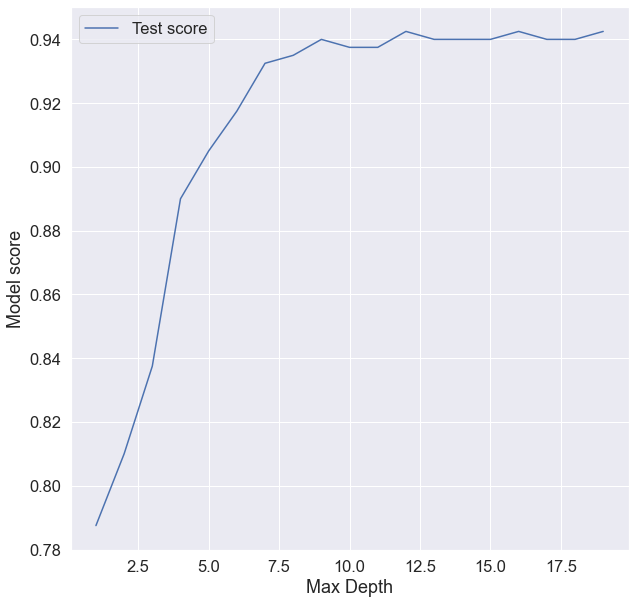

In [97]:
plt.figure(figsize=(10,10))
# plt.plot(estimators_list, train_scores, label="Train score")
plt.plot(max_depth_list, test_scores, label="Test score")
plt.xlabel("Max Depth")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum RandomForestClassifier score on test data : {max(test_scores)*100:.2f}")

## RandomizedSearchCV for finding best parameter

In [98]:
# Hyperparameter tuning using RandomizedSearchCV
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,750,50),
           "max_depth":[None,3,5,10,15],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [99]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(e_train,f_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 14.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 15],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710])},
                   verbose=True)

In [100]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_depth': 15}

In [101]:
rs_rf.score(ft1,ft2)

0.9375

In [102]:
preds_on_finaltest4 = rs_rf.predict(ft1)
preds_on_finaltest4.shape

(400,)

In [103]:
confusion_matrix(ft2,preds_on_finaltest4)

array([[182,  18],
       [  7, 193]], dtype=int64)

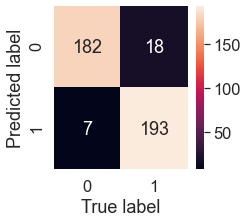

In [104]:
# Drawing confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(ft2,preds_on_finaltest4):
    # Plot a confusion matrix using Seaborn's heatmap()
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ft2,preds_on_finaltest4),
                     annot=True,    # annot is true then only the numbers will appear in matrix otherwise won't
                     cbar=True,     # Color bar on right will be shown if true
                     fmt='g')       # By default .2g was showing error, so it is set to g
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
      

plot_conf_mat(ft2,preds_on_finaltest4)

## Manually controlling Precision and Recall. And gain 3% more recall for attrited customers

In [105]:
preds_on_finaltest5 = rs_rf.predict_proba(ft1)
preds_on_finaltest5.shape

(400, 2)

In [106]:
my_custom_pred2 = []
for i in range(0,400):
    for j in range(0,1):
        if (preds_on_finaltest5[i][j]>0.35):
            my_custom_pred2.append(0)
        else :
            my_custom_pred2.append(1)
len(my_custom_pred2)

400

In [107]:
my_custom_pred2_mat = np.matrix(my_custom_pred2)
my_custom_pred2_mat = my_custom_pred2_mat.reshape(-1,1)
my_custom_pred2_mat.shape

(400, 1)

In [108]:
confusion_matrix(ft2,my_custom_pred2_mat)

array([[192,   8],
       [ 14, 186]], dtype=int64)

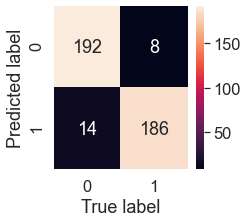

In [109]:
# Drawing confusion matrix

sns.set(font_scale=1.5)

def plot_conf_mat(ft2,my_custom_pred2_mat):
    # Plot a confusion matrix using Seaborn's heatmap()
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ft2,my_custom_pred2_mat),
                     annot=True,    # annot is true then only the numbers will appear in matrix otherwise won't
                     cbar=True,     # Color bar on right will be shown if true
                     fmt='g')       # By default .2g was showing error, so it is set to g
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
      

plot_conf_mat(ft2,my_custom_pred2_mat)

In [110]:
print(classification_report(ft2,my_custom_pred2_mat))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       200
           1       0.96      0.93      0.94       200

    accuracy                           0.94       400
   macro avg       0.95      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



## Saving our model

In [111]:
import pickle
# Pickling is process to convert python object into a byte stream
# Unpickling is process where byte stream is converted to python object
# Save an existing model to file
pickle.dump(rs_rf,open("ChurningCustomers_RandomForest.pkl","wb"))